In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('../DataSets/winequality-red.csv')

label =  np.unique(raw_data['quality'])
label

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [3]:
train_data = raw_data.iloc[ : int(raw_data.shape[0] * .75) , :]
test_data = raw_data.iloc[int(raw_data.shape[0] * .75) : , :]
train_data_labels = train_data['quality']
test_data_labels = test_data['quality']
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
del train_data['quality'] , test_data['quality']

In [6]:
# Standardize data
train_data_normalize = ((train_data - np.mean(train_data)) / np.std(train_data))
test_data_normalize = ((test_data - np.mean(test_data)) / np.std(test_data))
train_data_normalize.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.687948,1.009682,-1.491607,-0.525724,-0.274715,-0.415701,-0.379669,0.394939,1.354414,-0.601306,-0.900712
1,-0.463362,2.014523,-1.491607,0.028111,0.180864,0.956022,0.592778,-0.137748,-0.631550,0.081104,-0.534222
2,-0.463362,1.344629,-1.288220,-0.209247,0.056615,-0.023780,0.209693,-0.031210,-0.247170,-0.089499,-0.534222
3,1.445622,-1.334945,1.355818,-0.525724,-0.295423,0.172180,0.386501,0.501476,-0.887804,-0.487571,-0.534222
4,-0.687948,1.009682,-1.491607,-0.525724,-0.274715,-0.415701,-0.379669,0.394939,1.354414,-0.601306,-0.900712


In [7]:
train_data_normalize = np.array(train_data_normalize)
train_data_labels = np.array(train_data_labels)

test_data_normalize = np.array(test_data_normalize)
test_data_labels = np.array(test_data_labels)

In [8]:
class NeuralNetwork():
    
    def __init__(self,lmda = 0):
        
        self.input_layer_n   = 11
        self.hidden_layer1_n = 12
        self.hidden_layer2_n = 12
        self.hidden_layer3_n = 12
        self.output_layer = 6
        self.lmda = lmda
        self.label_length = 6
        
        self.theta_layer1 = np.random.randn(self.input_layer_n   , self.hidden_layer1_n)
        self.theta_layer2 = np.random.randn(self.hidden_layer1_n , self.hidden_layer2_n)
        self.theta_layer3 = np.random.randn(self.hidden_layer2_n , self.hidden_layer3_n)
        self.theta_layer4 = np.random.randn(self.hidden_layer3_n , self.output_layer)
        
    def one_hot_label(self , data , label_length):
        one_hot_labels = np.zeros((data.shape[0] , label_length))
        for i in range(data.shape[0]):  
            one_hot_labels[i, data[i]-3 ] = 1  # our labels is 3,4,5,6,7,8 is we subtract by 3 it is 0,1,2,3,4,5
        return one_hot_labels


    def softmax(self , activation , theta):
        exp = np.exp( np.dot ( activation , theta ))
        denominator = np.sum( exp , axis = 1)
        s = list(map(lambda i : exp[:,i] / denominator , np.arange(self.label_length)))
        return np.array(s).T
        
    def sigmoid(self, activation , theta):
        return 1 / (1 + np.exp(np.dot(activation , theta)))

    def forwardPropagation(self,X):
        self.activation_layer_0 = X
        self.activation_layer_1 = self.sigmoid(self.activation_layer_0 , self.theta_layer1)
        self.activation_layer_2 = self.sigmoid(self.activation_layer_1 , self.theta_layer2)
        self.activation_layer_3 = self.sigmoid(self.activation_layer_2 , self.theta_layer3)
        self.activation_layer_4 = self.softmax(self.activation_layer_3 , self.theta_layer4)
        return self.activation_layer_4
        
    def costFunction(self,X,y):
        ''' Provide labels as "Y" '''
        self.y = self.one_hot_label( y , self.label_length)
        self.y_cap = self.forwardPropagation(X)
        return -np.sum(self.y * np.log(self.y_cap))
     
    
    def costFunctionDerivative(self,X,y):
        self.y_cap = self.forwardPropagation(X)
        dA1_dtheta_layer_1 = self.activation_layer_1 * ( 1-self.activation_layer_1 )   
        dA2_dtheta_layer_2 = self.activation_layer_2 * ( 1-self.activation_layer_2 )
        dA3_dtheta_layer_3 = self.activation_layer_3 * ( 1-self.activation_layer_3 ) # derivative w.r.t all layers activation
    
        self.target_y = self.one_hot_label(y , self.label_length)
        dL_dA4 = (self.y_cap - self.target_y)
        dL_dA3 = np.dot( dL_dA4 , self.theta_layer4.T )
        dL_dA2 = np.dot( dL_dA3 * dA3_dtheta_layer_3 ,self.theta_layer3.T )
        dL_dA1 = np.dot( dL_dA2 * dA2_dtheta_layer_2 ,self.theta_layer2.T  )
        
        dL_dtheta_layer_4 =  1/X.shape[0] * (np.dot(self.activation_layer_3.T , dL_dA4)) 
        dL_dtheta_layer_3 =  1/X.shape[0] * (np.dot(self.activation_layer_2.T , dA3_dtheta_layer_3 * dL_dA3))
        dL_dtheta_layer_2 =  1/X.shape[0] * (np.dot(self.activation_layer_1.T , dA2_dtheta_layer_2 * dL_dA2))
        dL_dtheta_layer_1 =  1/X.shape[0] * (np.dot(self.activation_layer_0.T , dA1_dtheta_layer_1 * dL_dA1))       
        
        return dL_dtheta_layer_1 , dL_dtheta_layer_2 , dL_dtheta_layer_3 , dL_dtheta_layer_4
      

In [9]:
def gradientDecent(NN , X , y,batch):
    alpha = 0.01
    epsilon = 0.001
    i = 1
    itera = []
    csfun = []
    while i < 5000:
        index = np.random.randint(0 , X.shape[0] , size=(batch,))
        
        initial_cost = NN.costFunction(X[index] , y[index] )
        
        theta1 , theta2 , theta3 , theta4  = NN.costFunctionDerivative(X[index], y[index] )
        
        NN.theta_layer1 -=  alpha * theta1
        NN.theta_layer2 -=  alpha * theta2
        NN.theta_layer3 -=  alpha * theta3
        NN.theta_layer4 -=  alpha * theta4
        
        final_cost = NN.costFunction(X[index] , y[index])
        
        #if abs(final_cost - initial_cost) < epsilon:
         #   break
        print('Iteration {} Initial cost {} final cost {}'.format(i , initial_cost , final_cost))    
        
        itera.append(i)
        csfun.append(final_cost)
        i+=1
    return itera , csfun

In [10]:
NN = NeuralNetwork()
itera , csfun = gradientDecent(NN , train_data_normalize , train_data_labels , 32)

Iteration 1 Initial cost 85.53848918958765 final cost 84.89705605289444
Iteration 2 Initial cost 91.34421209754498 final cost 90.6902523886411
Iteration 3 Initial cost 95.15792661709875 final cost 94.18149194906886
Iteration 4 Initial cost 93.73381148850302 final cost 92.72571315840497
Iteration 5 Initial cost 70.99748232450405 final cost 70.5726624894576
Iteration 6 Initial cost 90.80379126185272 final cost 89.89012366358133
Iteration 7 Initial cost 86.92291667459216 final cost 86.07541678154203
Iteration 8 Initial cost 89.72383225139839 final cost 88.95935516694846
Iteration 9 Initial cost 77.02978626397535 final cost 76.41711180753353
Iteration 10 Initial cost 72.82475850314013 final cost 72.19382365443883
Iteration 11 Initial cost 76.30507507428618 final cost 75.59643500279748
Iteration 12 Initial cost 83.11319541273711 final cost 82.22076207322472
Iteration 13 Initial cost 69.46101852796639 final cost 68.95901280076774
Iteration 14 Initial cost 74.96304639132813 final cost 74.3972

Iteration 118 Initial cost 39.48200847245784 final cost 39.37016247345202
Iteration 119 Initial cost 43.754189653161035 final cost 43.542863312519884
Iteration 120 Initial cost 42.67607385482112 final cost 42.51918635027167
Iteration 121 Initial cost 42.886619878695186 final cost 42.74590616375071
Iteration 122 Initial cost 43.442902430974534 final cost 43.364875685575356
Iteration 123 Initial cost 43.98400257195436 final cost 43.822624734349304
Iteration 124 Initial cost 40.95002417139389 final cost 40.84314518069958
Iteration 125 Initial cost 42.85143189713373 final cost 42.73763883348926
Iteration 126 Initial cost 40.14113258602529 final cost 40.08985829035735
Iteration 127 Initial cost 42.83856604208755 final cost 42.554843704833594
Iteration 128 Initial cost 43.84565263919355 final cost 43.68597311981355
Iteration 129 Initial cost 40.6598769229042 final cost 40.46391215131669
Iteration 130 Initial cost 39.81336970501245 final cost 39.678019413306274
Iteration 131 Initial cost 40.6

Iteration 269 Initial cost 39.735995034239636 final cost 39.71906105830587
Iteration 270 Initial cost 39.574910621663165 final cost 39.54883141696621
Iteration 271 Initial cost 34.017602230680446 final cost 33.99311802178969
Iteration 272 Initial cost 39.46082308939961 final cost 39.4442846161228
Iteration 273 Initial cost 36.2490211808902 final cost 36.17530531351092
Iteration 274 Initial cost 38.65740227420959 final cost 38.587299984110274
Iteration 275 Initial cost 42.34951461774665 final cost 42.34255790628171
Iteration 276 Initial cost 40.79257927550067 final cost 40.77063286268647
Iteration 277 Initial cost 39.12633357598851 final cost 38.922008131092355
Iteration 278 Initial cost 36.830365435559486 final cost 36.804932595866546
Iteration 279 Initial cost 34.14455864868136 final cost 34.13478308812613
Iteration 280 Initial cost 38.74224226438641 final cost 38.72757659632494
Iteration 281 Initial cost 40.562566629468265 final cost 40.56023294353729
Iteration 282 Initial cost 37.01

Iteration 393 Initial cost 35.308942876651344 final cost 35.30485930221026
Iteration 394 Initial cost 41.40580569523395 final cost 41.39664930427206
Iteration 395 Initial cost 30.309517831884875 final cost 30.26041220331208
Iteration 396 Initial cost 36.27389118767055 final cost 36.263012477134886
Iteration 397 Initial cost 37.679572340850825 final cost 37.569628727883014
Iteration 398 Initial cost 34.15516308393238 final cost 34.13521113188713
Iteration 399 Initial cost 34.717035353886516 final cost 34.695164177081665
Iteration 400 Initial cost 31.56948673205312 final cost 31.504191816269085
Iteration 401 Initial cost 38.52954339977581 final cost 38.52221662335471
Iteration 402 Initial cost 44.16786256406081 final cost 44.104815832502865
Iteration 403 Initial cost 36.84877268069518 final cost 36.804692239639735
Iteration 404 Initial cost 36.05658333141787 final cost 36.025973071376
Iteration 405 Initial cost 36.75925890900865 final cost 36.749122776284935
Iteration 406 Initial cost 32

Iteration 525 Initial cost 38.115594607808745 final cost 38.10066513802568
Iteration 526 Initial cost 32.502038889428405 final cost 32.47955587625109
Iteration 527 Initial cost 40.12215935728624 final cost 40.065163808867695
Iteration 528 Initial cost 43.920961170952125 final cost 43.912416701939385
Iteration 529 Initial cost 41.0837025515893 final cost 41.03549308215241
Iteration 530 Initial cost 36.8782036503661 final cost 36.86304651522208
Iteration 531 Initial cost 30.19764847707202 final cost 30.136732788238156
Iteration 532 Initial cost 36.839851894751014 final cost 36.82306734484014
Iteration 533 Initial cost 32.23453349984646 final cost 32.1868864031514
Iteration 534 Initial cost 35.064923538496465 final cost 35.058525578680275
Iteration 535 Initial cost 44.71796653640962 final cost 44.529679482672876
Iteration 536 Initial cost 37.253636886964195 final cost 37.245016183249454
Iteration 537 Initial cost 31.205299777940045 final cost 31.192115944733942
Iteration 538 Initial cost 

Iteration 668 Initial cost 34.966872633202044 final cost 34.91881308378369
Iteration 669 Initial cost 41.19289821197665 final cost 41.18598768600502
Iteration 670 Initial cost 33.70790702366162 final cost 33.69052079965493
Iteration 671 Initial cost 42.730648245635436 final cost 42.63524122056276
Iteration 672 Initial cost 33.92352642760396 final cost 33.92029540862403
Iteration 673 Initial cost 33.64499961174499 final cost 33.600869100703505
Iteration 674 Initial cost 32.95572422757578 final cost 32.942648742424076
Iteration 675 Initial cost 39.668438375646616 final cost 39.659262698616956
Iteration 676 Initial cost 46.46266025601325 final cost 46.43464589307108
Iteration 677 Initial cost 43.64903697628523 final cost 43.642762803505256
Iteration 678 Initial cost 31.328313607316673 final cost 31.2733703713019
Iteration 679 Initial cost 39.403302139445756 final cost 39.39598491489596
Iteration 680 Initial cost 32.47325894881421 final cost 32.45879618281805
Iteration 681 Initial cost 37.

Iteration 828 Initial cost 38.15583894297056 final cost 38.14556812298899
Iteration 829 Initial cost 42.175590916567 final cost 42.16605892649483
Iteration 830 Initial cost 34.677309463826106 final cost 34.630093006718866
Iteration 831 Initial cost 36.883527937722604 final cost 36.868143441630096
Iteration 832 Initial cost 36.326603349200084 final cost 36.313797957921736
Iteration 833 Initial cost 43.0382062223522 final cost 43.00851726134954
Iteration 834 Initial cost 44.17803310932449 final cost 44.16484653260663
Iteration 835 Initial cost 40.34827331281172 final cost 40.29146898414383
Iteration 836 Initial cost 39.298968039766834 final cost 39.27548800209089
Iteration 837 Initial cost 29.659899265093802 final cost 29.620699524631895
Iteration 838 Initial cost 32.15206863772286 final cost 32.088232028330815
Iteration 839 Initial cost 32.995698891163876 final cost 32.988439777457316
Iteration 840 Initial cost 42.17428674989738 final cost 42.105931947249545
Iteration 841 Initial cost 3

Iteration 939 Initial cost 31.601517893942493 final cost 31.572110057476145
Iteration 940 Initial cost 49.06581001271023 final cost 48.98755748637214
Iteration 941 Initial cost 38.49117488906457 final cost 38.489065852699774
Iteration 942 Initial cost 40.144963992154075 final cost 40.08688931517973
Iteration 943 Initial cost 46.42888612022753 final cost 46.38277891493622
Iteration 944 Initial cost 39.54837416884412 final cost 39.50119961060092
Iteration 945 Initial cost 29.487295531359198 final cost 29.468150428831116
Iteration 946 Initial cost 37.596642844470914 final cost 37.586269957875835
Iteration 947 Initial cost 34.04652265582182 final cost 34.035729096849934
Iteration 948 Initial cost 42.83980628356794 final cost 42.813085127072156
Iteration 949 Initial cost 33.57303192833431 final cost 33.55222301421857
Iteration 950 Initial cost 30.772000675376688 final cost 30.719308648317167
Iteration 951 Initial cost 39.9110253019427 final cost 39.87280782567719
Iteration 952 Initial cost 

Iteration 1091 Initial cost 37.25163643574427 final cost 37.24585133842035
Iteration 1092 Initial cost 36.632678262567325 final cost 36.61393404254203
Iteration 1093 Initial cost 32.3678981723653 final cost 32.35151047641791
Iteration 1094 Initial cost 38.8668111596797 final cost 38.81913999638449
Iteration 1095 Initial cost 35.83848448643452 final cost 35.803015142402295
Iteration 1096 Initial cost 33.030254937331584 final cost 32.99515450740796
Iteration 1097 Initial cost 31.096053145944772 final cost 31.080001530144767
Iteration 1098 Initial cost 41.87145467936164 final cost 41.85342473407083
Iteration 1099 Initial cost 38.60634381186273 final cost 38.584792288873516
Iteration 1100 Initial cost 37.24004681580095 final cost 37.139345713968495
Iteration 1101 Initial cost 32.08717850836709 final cost 32.073775999959054
Iteration 1102 Initial cost 33.11828017241575 final cost 33.08805555560712
Iteration 1103 Initial cost 37.05435764656807 final cost 37.03037630492343
Iteration 1104 Init

Iteration 1226 Initial cost 37.47915331089016 final cost 37.36740817502571
Iteration 1227 Initial cost 33.76845892953824 final cost 33.7631195813257
Iteration 1228 Initial cost 32.10414030666213 final cost 32.06267304035138
Iteration 1229 Initial cost 40.880018372242716 final cost 40.829109795081436
Iteration 1230 Initial cost 35.586939098146544 final cost 35.58311619771609
Iteration 1231 Initial cost 42.501921734689795 final cost 42.462327473746015
Iteration 1232 Initial cost 32.64553486827996 final cost 32.637642367989756
Iteration 1233 Initial cost 37.48230696254983 final cost 37.46508608642333
Iteration 1234 Initial cost 42.34488565222873 final cost 42.28416680850338
Iteration 1235 Initial cost 36.099694245108516 final cost 36.02527965801031
Iteration 1236 Initial cost 33.58058418465959 final cost 33.5291565442685
Iteration 1237 Initial cost 32.90338181869562 final cost 32.86034624228899
Iteration 1238 Initial cost 43.43791877666192 final cost 43.39752089731348
Iteration 1239 Initi

Iteration 1369 Initial cost 44.07421615269325 final cost 44.043213513561845
Iteration 1370 Initial cost 42.42880598971698 final cost 42.41391668241615
Iteration 1371 Initial cost 36.33823047414701 final cost 36.290289223228434
Iteration 1372 Initial cost 44.81751605544404 final cost 44.76993464497332
Iteration 1373 Initial cost 36.60780363211948 final cost 36.57335190519442
Iteration 1374 Initial cost 39.63656250614905 final cost 39.63026796253918
Iteration 1375 Initial cost 39.735204051588504 final cost 39.70534479516192
Iteration 1376 Initial cost 33.58475543745922 final cost 33.571415510288325
Iteration 1377 Initial cost 35.22549599661815 final cost 35.17856725222104
Iteration 1378 Initial cost 33.348856840958575 final cost 33.33219825676634
Iteration 1379 Initial cost 34.08488595354086 final cost 34.07186431804791
Iteration 1380 Initial cost 38.7576903945543 final cost 38.68738137170793
Iteration 1381 Initial cost 38.51391777418975 final cost 38.50579992683828
Iteration 1382 Initia

Iteration 1485 Initial cost 37.69801958885067 final cost 37.69382356830527
Iteration 1486 Initial cost 38.96750164734817 final cost 38.89072535574899
Iteration 1487 Initial cost 35.83251482217078 final cost 35.83029516442613
Iteration 1488 Initial cost 34.91041667499094 final cost 34.88144090558159
Iteration 1489 Initial cost 34.16930081604072 final cost 34.15854590230471
Iteration 1490 Initial cost 32.288459985534246 final cost 32.15875650941463
Iteration 1491 Initial cost 35.50313732268486 final cost 35.47995444108631
Iteration 1492 Initial cost 34.77782658602276 final cost 34.73942601295077
Iteration 1493 Initial cost 34.447143248642384 final cost 34.43060848163287
Iteration 1494 Initial cost 37.88080365430636 final cost 37.8772541271764
Iteration 1495 Initial cost 30.46578830067944 final cost 30.4583342795359
Iteration 1496 Initial cost 37.75719314173449 final cost 37.75198932602697
Iteration 1497 Initial cost 39.97850475663563 final cost 39.94088452936068
Iteration 1498 Initial co

Iteration 1624 Initial cost 39.328904733130024 final cost 39.32302552788771
Iteration 1625 Initial cost 38.86853454572475 final cost 38.847930659450824
Iteration 1626 Initial cost 29.01100727865722 final cost 28.9824767217935
Iteration 1627 Initial cost 36.61324808884116 final cost 36.56076475158688
Iteration 1628 Initial cost 33.802610640254635 final cost 33.793377242091076
Iteration 1629 Initial cost 35.427984649136114 final cost 35.38513298889163
Iteration 1630 Initial cost 34.21670195050063 final cost 34.19645472854251
Iteration 1631 Initial cost 38.31838180295603 final cost 38.26430710898296
Iteration 1632 Initial cost 41.55724635928865 final cost 41.509598306793904
Iteration 1633 Initial cost 32.496763527079864 final cost 32.471131493661694
Iteration 1634 Initial cost 37.990513905424265 final cost 37.96495827469754
Iteration 1635 Initial cost 32.67822148485568 final cost 32.63405822872333
Iteration 1636 Initial cost 33.02313169922988 final cost 32.98814031784937
Iteration 1637 In

Iteration 1774 Initial cost 37.137701037952596 final cost 37.12864732202415
Iteration 1775 Initial cost 37.58936252111643 final cost 37.54496217586001
Iteration 1776 Initial cost 39.55880519976503 final cost 39.533805098844695
Iteration 1777 Initial cost 30.517895957272717 final cost 30.49091925940693
Iteration 1778 Initial cost 30.74638478891587 final cost 30.729854572340443
Iteration 1779 Initial cost 42.39146588160855 final cost 42.35542228076057
Iteration 1780 Initial cost 37.37571538615599 final cost 37.36987085543204
Iteration 1781 Initial cost 39.49082104516165 final cost 39.48359799674914
Iteration 1782 Initial cost 48.49754281425496 final cost 48.482819439301664
Iteration 1783 Initial cost 35.049143927391086 final cost 34.94199700265527
Iteration 1784 Initial cost 33.26701494372072 final cost 33.25910910771746
Iteration 1785 Initial cost 39.27706039042039 final cost 39.25410038476035
Iteration 1786 Initial cost 34.726504385075565 final cost 34.69735833593738
Iteration 1787 Ini

Iteration 1913 Initial cost 40.13552825771394 final cost 40.115982794878654
Iteration 1914 Initial cost 34.52906840421296 final cost 34.50200353271431
Iteration 1915 Initial cost 31.17644978007953 final cost 31.173191788265015
Iteration 1916 Initial cost 36.23612205613287 final cost 36.22990065425553
Iteration 1917 Initial cost 41.02485656439598 final cost 41.02054040820245
Iteration 1918 Initial cost 37.005791978708345 final cost 36.99097244874339
Iteration 1919 Initial cost 31.092440552861742 final cost 30.9343019689857
Iteration 1920 Initial cost 41.59468541225811 final cost 41.553595734837984
Iteration 1921 Initial cost 39.52440215340076 final cost 39.51025917812062
Iteration 1922 Initial cost 28.759944208745647 final cost 28.742139668847233
Iteration 1923 Initial cost 37.0765685380702 final cost 37.06835603257874
Iteration 1924 Initial cost 39.493309245021635 final cost 39.42603969940503
Iteration 1925 Initial cost 33.55910516380085 final cost 33.50443887563537
Iteration 1926 Init

Iteration 2048 Initial cost 32.138423514879406 final cost 32.126701952431944
Iteration 2049 Initial cost 35.78432019298009 final cost 35.76339084230916
Iteration 2050 Initial cost 35.425482581516235 final cost 35.39119468463645
Iteration 2051 Initial cost 40.781591276348166 final cost 40.76449372698011
Iteration 2052 Initial cost 34.40611257252749 final cost 34.39687338122492
Iteration 2053 Initial cost 30.088766725971364 final cost 30.056700874211717
Iteration 2054 Initial cost 35.67521192195204 final cost 35.66757515943095
Iteration 2055 Initial cost 41.361137187385296 final cost 41.355064405155375
Iteration 2056 Initial cost 32.248188502324965 final cost 32.235195575388744
Iteration 2057 Initial cost 37.435161565122264 final cost 37.431437108326264
Iteration 2058 Initial cost 35.295383791712744 final cost 35.281382743604624
Iteration 2059 Initial cost 43.40857705767033 final cost 43.391262879480486
Iteration 2060 Initial cost 43.21312819747055 final cost 43.12717103187345
Iteration 

Iteration 2198 Initial cost 43.84824834941604 final cost 43.83703251985071
Iteration 2199 Initial cost 41.154711283187794 final cost 41.145455709246974
Iteration 2200 Initial cost 38.625584348211575 final cost 38.58853115438095
Iteration 2201 Initial cost 39.857101466099394 final cost 39.84641825220732
Iteration 2202 Initial cost 30.24752312811611 final cost 30.205399431240636
Iteration 2203 Initial cost 33.504862680453726 final cost 33.502862732075656
Iteration 2204 Initial cost 32.99601391870141 final cost 32.86177181713598
Iteration 2205 Initial cost 40.43267317268124 final cost 40.43078439958328
Iteration 2206 Initial cost 39.62413347500265 final cost 39.605611761390335
Iteration 2207 Initial cost 30.25794489113138 final cost 30.224144391682845
Iteration 2208 Initial cost 38.00782559359638 final cost 37.96718999783015
Iteration 2209 Initial cost 40.107413037268145 final cost 40.10200327638634
Iteration 2210 Initial cost 35.27356796122878 final cost 35.25330981601883
Iteration 2211 

Iteration 2354 Initial cost 31.08744399420108 final cost 31.075762625538154
Iteration 2355 Initial cost 33.45037494468178 final cost 33.43341345469927
Iteration 2356 Initial cost 38.418451583285616 final cost 38.39320821734525
Iteration 2357 Initial cost 33.78029568170895 final cost 33.768023782619196
Iteration 2358 Initial cost 41.31439471000141 final cost 41.27501391450237
Iteration 2359 Initial cost 39.169768363697834 final cost 39.11864848430751
Iteration 2360 Initial cost 32.38770715458614 final cost 32.355383683319715
Iteration 2361 Initial cost 30.88168117121566 final cost 30.755480798964562
Iteration 2362 Initial cost 46.3139910239324 final cost 46.26161523098415
Iteration 2363 Initial cost 42.37734847137878 final cost 42.34582210327879
Iteration 2364 Initial cost 34.0596121087192 final cost 34.054148541885354
Iteration 2365 Initial cost 39.748275629176916 final cost 39.728710326134305
Iteration 2366 Initial cost 35.17149874138082 final cost 35.17026687857728
Iteration 2367 Ini

Iteration 2518 Initial cost 35.86430558381952 final cost 35.79311084576504
Iteration 2519 Initial cost 37.629899793332726 final cost 37.62567086167303
Iteration 2520 Initial cost 35.13371910954778 final cost 35.13263419273146
Iteration 2521 Initial cost 36.07386591929478 final cost 35.95067596634442
Iteration 2522 Initial cost 29.17178854791654 final cost 29.14588922076716
Iteration 2523 Initial cost 41.649250612986656 final cost 41.63347665375791
Iteration 2524 Initial cost 34.17566790198943 final cost 34.17028845168077
Iteration 2525 Initial cost 34.25894681956066 final cost 34.25519262939526
Iteration 2526 Initial cost 36.62816175917375 final cost 36.55593248891306
Iteration 2527 Initial cost 35.27581644347748 final cost 35.27442037496645
Iteration 2528 Initial cost 34.57390631497168 final cost 34.54728255020121
Iteration 2529 Initial cost 30.828463031910815 final cost 30.815860601656524
Iteration 2530 Initial cost 33.47749075180832 final cost 33.46376372249807
Iteration 2531 Initia

Iteration 2668 Initial cost 43.192488597741104 final cost 43.16977875426347
Iteration 2669 Initial cost 39.339521776056166 final cost 39.32875198911771
Iteration 2670 Initial cost 33.65208075066319 final cost 33.610528694723456
Iteration 2671 Initial cost 29.358674386559585 final cost 29.35299644007905
Iteration 2672 Initial cost 32.88777606341755 final cost 32.87837516006675
Iteration 2673 Initial cost 40.93011740178275 final cost 40.900167427759314
Iteration 2674 Initial cost 37.232351260724876 final cost 37.22739298197088
Iteration 2675 Initial cost 36.194483144851844 final cost 36.18205430900936
Iteration 2676 Initial cost 37.34622656351742 final cost 37.26397778748613
Iteration 2677 Initial cost 35.935075936823814 final cost 35.89059386832838
Iteration 2678 Initial cost 33.005113225208675 final cost 32.95377695305917
Iteration 2679 Initial cost 37.37203060253785 final cost 37.322811002693435
Iteration 2680 Initial cost 37.95715547631569 final cost 37.95256426142136
Iteration 2681 

Iteration 2796 Initial cost 43.61834784691305 final cost 43.58643742405218
Iteration 2797 Initial cost 31.476529216281076 final cost 31.46217447707208
Iteration 2798 Initial cost 51.919484498499514 final cost 51.82626788206654
Iteration 2799 Initial cost 36.241391538658576 final cost 36.234655571123284
Iteration 2800 Initial cost 31.657580043118152 final cost 31.63830234770206
Iteration 2801 Initial cost 34.70890787311608 final cost 34.624283593308384
Iteration 2802 Initial cost 35.054169808795734 final cost 35.05191512051356
Iteration 2803 Initial cost 33.29748105826289 final cost 33.27497170017054
Iteration 2804 Initial cost 40.627555025250054 final cost 40.62136980127165
Iteration 2805 Initial cost 32.32919865531096 final cost 32.31707908973232
Iteration 2806 Initial cost 33.264265678244584 final cost 33.22541362541416
Iteration 2807 Initial cost 30.052436482538432 final cost 30.02862803187301
Iteration 2808 Initial cost 44.443512886140816 final cost 44.42519500984827
Iteration 2809

Iteration 2950 Initial cost 33.46199578169563 final cost 33.44249681702833
Iteration 2951 Initial cost 29.599685131026853 final cost 29.536812026832195
Iteration 2952 Initial cost 32.063845983777625 final cost 32.04189141688902
Iteration 2953 Initial cost 32.65941737407339 final cost 32.61005905299858
Iteration 2954 Initial cost 48.73231092137595 final cost 48.70813634813061
Iteration 2955 Initial cost 34.33583803990908 final cost 34.32097687606629
Iteration 2956 Initial cost 29.79364166286191 final cost 29.731915804030592
Iteration 2957 Initial cost 38.9610607876436 final cost 38.95937458477842
Iteration 2958 Initial cost 35.94485655474343 final cost 35.940989574763705
Iteration 2959 Initial cost 31.05649769689202 final cost 31.006916313520826
Iteration 2960 Initial cost 36.17497953711451 final cost 36.14160923344299
Iteration 2961 Initial cost 32.75044604750309 final cost 32.72003640544289
Iteration 2962 Initial cost 34.46962784600847 final cost 34.454858453664244
Iteration 2963 Init

Iteration 3091 Initial cost 32.78093523541879 final cost 32.758614804090016
Iteration 3092 Initial cost 32.516024171817236 final cost 32.4037620935528
Iteration 3093 Initial cost 39.1167070887321 final cost 39.11473000562236
Iteration 3094 Initial cost 41.60053919948355 final cost 41.583476966914
Iteration 3095 Initial cost 31.42639693942263 final cost 31.378859145399957
Iteration 3096 Initial cost 30.817201635647827 final cost 30.796342287246297
Iteration 3097 Initial cost 38.920533127739354 final cost 38.90495665871106
Iteration 3098 Initial cost 40.30670172365477 final cost 40.30165809167452
Iteration 3099 Initial cost 37.709000506652444 final cost 37.63490192914573
Iteration 3100 Initial cost 29.950152840589766 final cost 29.93531058753301
Iteration 3101 Initial cost 35.64739526931335 final cost 35.60180916355323
Iteration 3102 Initial cost 31.48452247450809 final cost 31.437706594162584
Iteration 3103 Initial cost 41.96200514152166 final cost 41.906758100342564
Iteration 3104 Init

Iteration 3232 Initial cost 29.842063471582733 final cost 29.820591233033348
Iteration 3233 Initial cost 38.21246559657436 final cost 38.20876582053046
Iteration 3234 Initial cost 38.19211012785955 final cost 38.08850595176625
Iteration 3235 Initial cost 39.97668571742177 final cost 39.945165972091246
Iteration 3236 Initial cost 27.96224910079698 final cost 27.92664669693962
Iteration 3237 Initial cost 30.27934100861685 final cost 30.246675995917712
Iteration 3238 Initial cost 31.5010529330727 final cost 31.49662674269304
Iteration 3239 Initial cost 38.28213364066135 final cost 38.20966333052475
Iteration 3240 Initial cost 34.911380273409804 final cost 34.91051062273
Iteration 3241 Initial cost 34.578338655289954 final cost 34.5716409580383
Iteration 3242 Initial cost 32.882307862597486 final cost 32.862972431822065
Iteration 3243 Initial cost 32.90143704497884 final cost 32.89067589202972
Iteration 3244 Initial cost 32.40520667092457 final cost 32.328700458942855
Iteration 3245 Initia

Iteration 3365 Initial cost 35.43543474836446 final cost 35.42005225137699
Iteration 3366 Initial cost 32.987422994018665 final cost 32.952860262005856
Iteration 3367 Initial cost 35.7297038673226 final cost 35.72365597798429
Iteration 3368 Initial cost 43.79707870649226 final cost 43.78227095422955
Iteration 3369 Initial cost 46.87269555224872 final cost 46.844508083061285
Iteration 3370 Initial cost 35.86737320740429 final cost 35.86070017995854
Iteration 3371 Initial cost 44.62185718770337 final cost 44.60595268667191
Iteration 3372 Initial cost 44.430903808004246 final cost 44.404294824036185
Iteration 3373 Initial cost 36.19070551020832 final cost 36.14453937146975
Iteration 3374 Initial cost 40.972814604697845 final cost 40.95001747453577
Iteration 3375 Initial cost 36.680900007810294 final cost 36.669876959168676
Iteration 3376 Initial cost 37.74338563764253 final cost 37.71670147513616
Iteration 3377 Initial cost 30.517453887438172 final cost 30.428270967749196
Iteration 3378 I

Iteration 3482 Initial cost 32.04922040840981 final cost 31.881429711076194
Iteration 3483 Initial cost 36.485194817406466 final cost 36.46081159693386
Iteration 3484 Initial cost 32.50283101670877 final cost 32.45193540398182
Iteration 3485 Initial cost 36.48353580447244 final cost 36.477257772335356
Iteration 3486 Initial cost 35.45514070614857 final cost 35.39476581542233
Iteration 3487 Initial cost 32.367484315874535 final cost 32.3410107542361
Iteration 3488 Initial cost 34.12962142644115 final cost 34.11417649577881
Iteration 3489 Initial cost 36.419479398033324 final cost 36.40017292643178
Iteration 3490 Initial cost 38.36757618378704 final cost 38.337115769473776
Iteration 3491 Initial cost 34.14725647862807 final cost 34.12607084157662
Iteration 3492 Initial cost 35.488904987546775 final cost 35.468358559973005
Iteration 3493 Initial cost 40.454906098144434 final cost 40.44484136285787
Iteration 3494 Initial cost 34.42801748556026 final cost 34.425849865137764
Iteration 3495 I

Iteration 3603 Initial cost 33.24767381876164 final cost 33.237882723663
Iteration 3604 Initial cost 43.23666240175126 final cost 43.181344420712726
Iteration 3605 Initial cost 36.77888160041292 final cost 36.75035953533495
Iteration 3606 Initial cost 37.51082560103297 final cost 37.499346126640106
Iteration 3607 Initial cost 41.418202042737995 final cost 41.40129742536254
Iteration 3608 Initial cost 35.837899293273054 final cost 35.81636368649926
Iteration 3609 Initial cost 40.342263569009845 final cost 40.32833173363724
Iteration 3610 Initial cost 34.546000425423 final cost 34.532258999153875
Iteration 3611 Initial cost 29.70204352736772 final cost 29.65862466966469
Iteration 3612 Initial cost 42.72958223668731 final cost 42.71821883850832
Iteration 3613 Initial cost 29.10854243760172 final cost 29.086747139374033
Iteration 3614 Initial cost 36.51405450164234 final cost 36.49746326305224
Iteration 3615 Initial cost 37.518467593272106 final cost 37.50719298287896
Iteration 3616 Initia

Iteration 3723 Initial cost 31.930158208144213 final cost 31.89309601817855
Iteration 3724 Initial cost 35.65363228303272 final cost 35.65178161722352
Iteration 3725 Initial cost 40.87117294491968 final cost 40.804721629131855
Iteration 3726 Initial cost 41.168876594609344 final cost 41.15944899432646
Iteration 3727 Initial cost 38.301797662861034 final cost 38.29857504060497
Iteration 3728 Initial cost 36.4888170898909 final cost 36.47104171075155
Iteration 3729 Initial cost 39.59385975474268 final cost 39.5438566555878
Iteration 3730 Initial cost 32.938734401647665 final cost 32.92185901845595
Iteration 3731 Initial cost 31.138391134523694 final cost 31.13166517511175
Iteration 3732 Initial cost 35.484236992981764 final cost 35.47817909072716
Iteration 3733 Initial cost 34.02215337734195 final cost 33.97688655240374
Iteration 3734 Initial cost 39.40216628888865 final cost 39.399594923533954
Iteration 3735 Initial cost 33.75707563260353 final cost 33.74750889610288
Iteration 3736 Init

Iteration 3840 Initial cost 38.58566541616233 final cost 38.511272195457806
Iteration 3841 Initial cost 37.54427781656443 final cost 37.50622055557331
Iteration 3842 Initial cost 38.92956127102867 final cost 38.91501082822489
Iteration 3843 Initial cost 40.15732312696327 final cost 40.0625230448846
Iteration 3844 Initial cost 36.20839462376188 final cost 36.16146596702093
Iteration 3845 Initial cost 36.94765483157686 final cost 36.91117980650115
Iteration 3846 Initial cost 40.46187073255739 final cost 40.43907403453322
Iteration 3847 Initial cost 29.35158837808204 final cost 29.283611560226724
Iteration 3848 Initial cost 36.955951183835765 final cost 36.908608045424934
Iteration 3849 Initial cost 34.08828121952909 final cost 34.07318375932962
Iteration 3850 Initial cost 36.276148669742504 final cost 36.260989038736966
Iteration 3851 Initial cost 43.10525337015952 final cost 43.0730818384374
Iteration 3852 Initial cost 48.34585626917965 final cost 48.308157482094146
Iteration 3853 Initi

Iteration 3958 Initial cost 37.33771959598833 final cost 37.32674400548643
Iteration 3959 Initial cost 31.439008165539853 final cost 31.434518311161085
Iteration 3960 Initial cost 38.79784000577719 final cost 38.78724115952532
Iteration 3961 Initial cost 36.44477539271175 final cost 36.430450018913845
Iteration 3962 Initial cost 36.73111602451064 final cost 36.702533055805425
Iteration 3963 Initial cost 35.9529783137192 final cost 35.95108905770767
Iteration 3964 Initial cost 42.70065187216858 final cost 42.68652154721528
Iteration 3965 Initial cost 35.813940549957444 final cost 35.77685564012327
Iteration 3966 Initial cost 34.51064683949821 final cost 34.49151171495508
Iteration 3967 Initial cost 35.086117223220285 final cost 35.08282044258176
Iteration 3968 Initial cost 34.72796059250284 final cost 34.72430136122948
Iteration 3969 Initial cost 37.048230081986844 final cost 37.04130347024663
Iteration 3970 Initial cost 45.56267411590849 final cost 45.49427954947129
Iteration 3971 Init

Iteration 4075 Initial cost 35.139742948465376 final cost 35.124481532357784
Iteration 4076 Initial cost 37.73066415212869 final cost 37.697289949850045
Iteration 4077 Initial cost 37.62708612479011 final cost 37.5752075577709
Iteration 4078 Initial cost 30.9841426610661 final cost 30.97432938858865
Iteration 4079 Initial cost 40.04805237696661 final cost 40.03755999233534
Iteration 4080 Initial cost 33.449101945169296 final cost 33.342997920815144
Iteration 4081 Initial cost 36.17625042893398 final cost 36.17116522018292
Iteration 4082 Initial cost 31.203967678288823 final cost 31.165568550958923
Iteration 4083 Initial cost 34.42625880645663 final cost 34.389294452870004
Iteration 4084 Initial cost 42.97367317286131 final cost 42.92626325961903
Iteration 4085 Initial cost 32.227884289544754 final cost 32.21998264091146
Iteration 4086 Initial cost 36.16260912872862 final cost 36.15139153624625
Iteration 4087 Initial cost 39.60528952207841 final cost 39.60394737164884
Iteration 4088 Ini

Iteration 4199 Initial cost 45.901554223662586 final cost 45.846061197754764
Iteration 4200 Initial cost 33.987728971075676 final cost 33.963857605100685
Iteration 4201 Initial cost 36.14633892281117 final cost 36.12098357338601
Iteration 4202 Initial cost 38.3048266106636 final cost 38.30385171986525
Iteration 4203 Initial cost 32.33685402650718 final cost 32.267562537984304
Iteration 4204 Initial cost 42.132521193778274 final cost 42.126650734720144
Iteration 4205 Initial cost 37.35493151812866 final cost 37.32190578484688
Iteration 4206 Initial cost 34.32725422108436 final cost 34.227221170269374
Iteration 4207 Initial cost 38.18756071479481 final cost 38.16273255254902
Iteration 4208 Initial cost 31.557709590071664 final cost 31.478267648443538
Iteration 4209 Initial cost 32.426052388867944 final cost 32.421256241649004
Iteration 4210 Initial cost 35.380514698233874 final cost 35.37757379083378
Iteration 4211 Initial cost 37.60631042279505 final cost 37.59195469310538
Iteration 421

Iteration 4316 Initial cost 36.10724041455845 final cost 36.08689665389049
Iteration 4317 Initial cost 47.32342551349365 final cost 47.29637006548552
Iteration 4318 Initial cost 35.98495057612795 final cost 35.95174030058951
Iteration 4319 Initial cost 37.389306481901684 final cost 37.37178184292687
Iteration 4320 Initial cost 32.076151911482484 final cost 32.05254762482434
Iteration 4321 Initial cost 32.15058899909437 final cost 32.14486096459963
Iteration 4322 Initial cost 33.37796330688655 final cost 33.36419802135295
Iteration 4323 Initial cost 38.90653712130822 final cost 38.90242141407885
Iteration 4324 Initial cost 50.93842151033272 final cost 50.89703037470301
Iteration 4325 Initial cost 31.021327371615943 final cost 31.006238768832567
Iteration 4326 Initial cost 33.762732162408994 final cost 33.755216224386956
Iteration 4327 Initial cost 38.98254867271894 final cost 38.94902282637528
Iteration 4328 Initial cost 31.792791744961573 final cost 31.758509289692853
Iteration 4329 In

Iteration 4453 Initial cost 44.36174058068886 final cost 44.33671370774118
Iteration 4454 Initial cost 41.5839080360389 final cost 41.52557301025816
Iteration 4455 Initial cost 35.33500662780272 final cost 35.33090916410916
Iteration 4456 Initial cost 33.417929193009314 final cost 33.39186047883978
Iteration 4457 Initial cost 36.93425734775578 final cost 36.8751564558251
Iteration 4458 Initial cost 31.865781680754335 final cost 31.855481917314584
Iteration 4459 Initial cost 35.648526974641335 final cost 35.614261424807694
Iteration 4460 Initial cost 32.44318818060089 final cost 32.430063489833536
Iteration 4461 Initial cost 40.035449216100936 final cost 40.01717597171539
Iteration 4462 Initial cost 30.78153093434775 final cost 30.76794283897161
Iteration 4463 Initial cost 34.36518791220152 final cost 34.35868637203744
Iteration 4464 Initial cost 35.1734173112499 final cost 35.11860492256013
Iteration 4465 Initial cost 34.86486018866209 final cost 34.812869373366
Iteration 4466 Initial 

Iteration 4580 Initial cost 32.11354304153451 final cost 32.08015615254651
Iteration 4581 Initial cost 49.7305525608773 final cost 49.68938905605174
Iteration 4582 Initial cost 35.605481352359675 final cost 35.51661567468822
Iteration 4583 Initial cost 32.85183689940949 final cost 32.7694579301686
Iteration 4584 Initial cost 43.78463909981197 final cost 43.7561286806847
Iteration 4585 Initial cost 31.622972875374927 final cost 31.563302229295928
Iteration 4586 Initial cost 31.835490723032173 final cost 31.80132447539529
Iteration 4587 Initial cost 33.060734587328 final cost 33.027082186237784
Iteration 4588 Initial cost 31.42282941350515 final cost 31.410090554672614
Iteration 4589 Initial cost 45.22598898412267 final cost 45.21461056481154
Iteration 4590 Initial cost 34.43318218118017 final cost 34.41560620977707
Iteration 4591 Initial cost 33.92112945508915 final cost 33.917265649463616
Iteration 4592 Initial cost 44.46929395092137 final cost 44.40797215666823
Iteration 4593 Initial 

Iteration 4721 Initial cost 40.18879840356595 final cost 40.179231570415844
Iteration 4722 Initial cost 34.24355975290186 final cost 34.21519289661312
Iteration 4723 Initial cost 33.60791264492673 final cost 33.576911137867484
Iteration 4724 Initial cost 42.851900823847075 final cost 42.7616108913805
Iteration 4725 Initial cost 34.13829119920936 final cost 34.07469044971259
Iteration 4726 Initial cost 36.42825245949246 final cost 36.40942273533042
Iteration 4727 Initial cost 32.47702745362773 final cost 32.4658953685058
Iteration 4728 Initial cost 34.97786280443246 final cost 34.97051755023979
Iteration 4729 Initial cost 38.04095614646606 final cost 37.97533874526165
Iteration 4730 Initial cost 44.61221208728645 final cost 44.58990672405659
Iteration 4731 Initial cost 37.20203975797086 final cost 37.188354608589
Iteration 4732 Initial cost 29.97849070402654 final cost 29.960152487892383
Iteration 4733 Initial cost 33.49407102991235 final cost 33.490793551933066
Iteration 4734 Initial c

Iteration 4980 Initial cost 33.46218634475507 final cost 33.45931189754624
Iteration 4981 Initial cost 37.60743530665501 final cost 37.59000964789722
Iteration 4982 Initial cost 42.14855375885148 final cost 42.13507450107974
Iteration 4983 Initial cost 32.62631691370317 final cost 32.58384218982408
Iteration 4984 Initial cost 33.78331364648274 final cost 33.759588015115376
Iteration 4985 Initial cost 30.69815438047052 final cost 30.69226994445352
Iteration 4986 Initial cost 36.25575533348764 final cost 36.25119719729451
Iteration 4987 Initial cost 43.03138394370174 final cost 43.00357988978998
Iteration 4988 Initial cost 40.64805855730418 final cost 40.64683312695355
Iteration 4989 Initial cost 42.35813703420906 final cost 42.33390442992245
Iteration 4990 Initial cost 32.08753470435101 final cost 32.077762820352
Iteration 4991 Initial cost 41.0782138712101 final cost 41.03204952001563
Iteration 4992 Initial cost 49.87028434663085 final cost 49.84058935931103
Iteration 4993 Initial cost

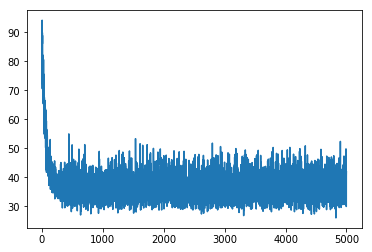

In [11]:
plt.plot(itera , csfun)

In [12]:
qq = (np.argmax(NN.forwardPropagation(train_data_normalize) , axis=1) +3)
co=0
for i in range(len(train_data_labels)):
    if qq[i] == train_data_labels[i]:
        co+=1
print('accuracy :')
print((co/len(train_data_labels))*100)

accuracy :
46.872393661384486


In [13]:
qq = (np.argmax(NN.forwardPropagation(test_data_normalize) , axis=1) +3)
co=0
for i in range(len(test_data_labels)):
    if qq[i] == test_data_labels[i]:
        co+=1
print('accuracy : ')
print((co/len(test_data_labels))*100)

accuracy : 
49.25


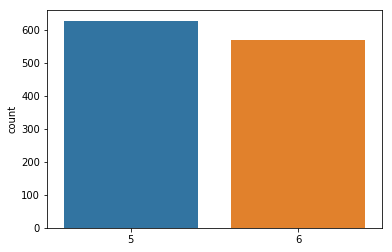

In [14]:
z  = (np.argmax(NN.forwardPropagation(train_data_normalize) , axis=1) + 3) 
sns.countplot(z)